In [1]:
#import necessary libraries.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly

In [2]:
df = pd.read_csv('data.csv', index_col='id')

Let us know some information about this data in order to understand it.

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se        

In [6]:
#drop unimportant column
df.drop(columns='Unnamed: 32',inplace=True)

In [7]:
# knowing more information about numerical data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


The dataset gives information about tumor features, that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. For each observation there are 10 features, which describe tumor size, density, texture, symmetry, and other characteristics of the cell nuclei 

The mean, standard error and "worst" mean (mean of the three largest values) of these features were computed for each image, resulting in 30 features. The categorical target feature indicates the type of the tumor.
for more information https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29?fbclid=IwAR1pkfU-Pp-y090BgJIpHAtOGJ9mf_RfUARNKzZ-LqFRyeLvul4R4nAgzbE

In [8]:
#  So I will look at the diagnosis column and divide the data into three parts.
df['diagnosis'].value_counts(normalize=True)
# These data tell us that there are 62% of cases benign and 37% of cases are Malignant.

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [9]:
# now we will convert this column to categorical type.
df['diagnosis']=df['diagnosis'].astype('category',inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
diagnosis                  569 non-null category
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se      

In [11]:
# it is time to divide data.
tumor_mean = df[['diagnosis',             
'radius_mean'           
,'texture_mean'          
,'perimeter_mean'        
,'area_mean'             
,'smoothness_mean'       
,'compactness_mean'      
,'concavity_mean'        
,'concave points_mean'   
,'symmetry_mean'         
,'fractal_dimension_mean']]
# standard erro
tumor_ste = df[['diagnosis','radius_se'             
,'texture_se'            
,'perimeter_se'          
,'area_se'               
,'smoothness_se'         
,'compactness_se'        
,'concavity_se'          
,'concave points_se'    
,'symmetry_se'           
,'fractal_dimension_se']]
tumor_worst =df[['diagnosis','radius_worst'           
,'texture_worst'          
,'perimeter_worst'        
,'area_worst'             
,'smoothness_worst'       
,'compactness_worst'      
,'concavity_worst'        
,'concave points_worst'   
,'symmetry_worst'         
,'fractal_dimension_worst']]

the data after divided

In [12]:
tumor_worst.head()

,diagnosis,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,
842302,M,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
tumor_ste.head()

,diagnosis,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,
842302,M,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [14]:
tumor_mean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


# Preprocessing 

### working in tumor_mean first 


In [15]:
# change columns name 
col=tumor_mean.columns.str.split('_').str[0]
tumor_mean.columns=col

In [16]:
tumor_mean.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [17]:
all_t=tumor_mean.groupby('diagnosis').sum()
all_t.style.background_gradient(cmap='Blues',subset=["radius"])\
                        .background_gradient(cmap='Reds',subset=["texture"])\
                        .background_gradient(cmap='Greens',subset=["perimeter"])\
                        .background_gradient(cmap='Purples',subset=["area"])\
                        .background_gradient(cmap='Pastel1_r',subset=["smoothness"])\
                        .background_gradient(cmap='YlOrBr',subset=["compactness"])\
                        .background_gradient(cmap='Pastel1_r',subset=["concavity"])\
                        .background_gradient(cmap='Blues',subset=["concave points"])\
                        .background_gradient(cmap='Reds',subset=["symmetry"])\
                        .background_gradient(cmap='Greens',subset=["fractal"])\

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
diagnosis,,,,,,,,,,
B,4336.31,6395.57,27872.9,165216,33.0145,28.5902,16.4426,9.18111,62.1844,22.4437
M,3702.12,4580.24,24457.5,207416,21.8145,30.7798,34.0842,18.6539,40.8967,13.2882


when we Looking , we find the sum of the radius, texture, perimeter, smoothness,symmetry and fractal
We find it greater, but this is not accurate information because the number of polyps is greater, but in
Area, compactness and concave points
Despite the small number of malignancies, this indicates that they have a significant impact on the type of disease

In [18]:
tumor_mean['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

I will separate the data that contain the type of malignant disease and the data that contain the type of benign disease

In [19]:
B_index=tumor_mean[tumor_mean['diagnosis']=='B'].index

In [20]:
B_tu=tumor_mean[tumor_mean['diagnosis']=='B']

In [21]:
B_tu=pd.DataFrame(B_tu)

In [22]:
B_tu.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
id,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503


In [23]:
M_ = tumor_mean.drop(index=B_index)

In [24]:
M_.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Now I will identify an equal number of malignant and benign disease in order to find accurate values

In [25]:
M_B=pd.concat([B_tu.iloc[0:212,:],M_])

In [26]:
M_B.shape

(424, 11)

In [27]:
all_t=M_B.groupby('diagnosis').sum()
all_t.style.background_gradient(cmap='Blues',subset=["radius"])\
                        .background_gradient(cmap='Reds',subset=["texture"])\
                        .background_gradient(cmap='Greens',subset=["perimeter"])\
                        .background_gradient(cmap='Purples',subset=["area"])\
                        .background_gradient(cmap='Pastel1_r',subset=["smoothness"])\
                        .background_gradient(cmap='YlOrBr',subset=["compactness"])\
                        .background_gradient(cmap='Pastel1_r',subset=["concavity"])\
                        .background_gradient(cmap='Blues',subset=["concave points"])\
                        .background_gradient(cmap='Reds',subset=["symmetry"])\
                        .background_gradient(cmap='Greens',subset=["fractal"])\

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
diagnosis,,,,,,,,,,
B,2559.62,3638.7,16439.5,96922.5,19.6267,16.4778,9.78364,5.36209,37.1622,13.317
M,3702.12,4580.24,24457.5,207416,21.8145,30.7798,34.0842,18.6539,40.8967,13.2882


Now we can see that the higher these values, the greater their effect on malignant disease. We can notice that there is a big difference in
[radius,area,compactness,concavity,concave points]
Also, there is a convergence of values in fractal 

# Visualization 

In [28]:
tumor_mean.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [29]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [30]:
# For Notebooks
init_notebook_mode(connected=True)

In [31]:
# For offline use
cf.go_offline()

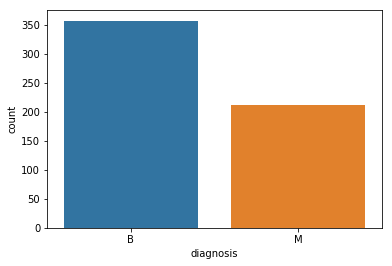

In [32]:
sns.countplot(x='diagnosis',data=tumor_mean)

In [33]:
tumor_mean['radius'].iplot(kind='hist')
#most radius btween 10 to 15

In [34]:
tumor_mean.iplot(kind='scatter',x='radius',y='texture',mode='markers',categories='diagnosis',size=10,xTitle='radius',yTitle='texture',title='The relationship of the texture to the type of tumor and radius')


We can see that the texture does not affect the type of disease, but we have noticed that when the diameter of the tumor is greater than 20, this indicates that the type of tumor is malignant.

In [35]:
tumor_mean.iplot(kind='scatter',x='radius',y='concavity',mode='markers',categories='diagnosis',size=10,xTitle='radius',yTitle='concavity',title='The relationship of the concavity to the type of tumor and radius')


We can see that concavity for adenoma is constant 0 to 0.15
As for the malignant disease, it is random and irregular

In [36]:
tumor_mean.iplot(kind='scatter',x='radius',y='compactness',mode='markers',categories='diagnosis',size=10,xTitle='radius',yTitle='compactness',title='The relationship of the compactness to the type of tumor and radius')


Most adenomas are between 0 and 1.7 in contrast to randomly spreading malignancies

In [37]:
tumor_mean.head()

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal
id,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [38]:
tumor_mean[['radius','texture']].iplot(kind='box')

In [39]:
tumor_mean[['area']].iplot(kind='box')

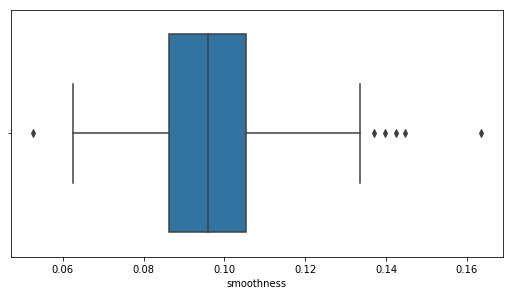

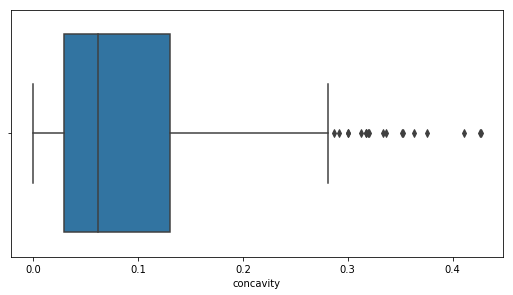

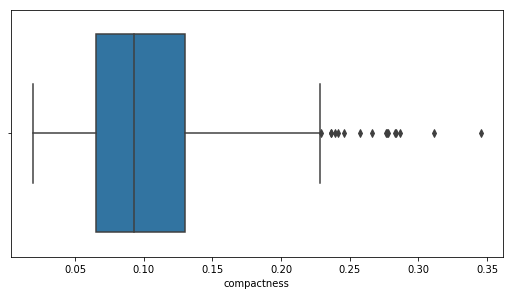

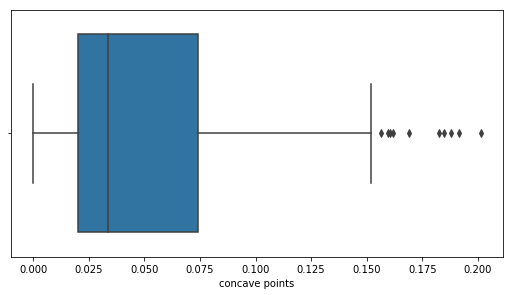

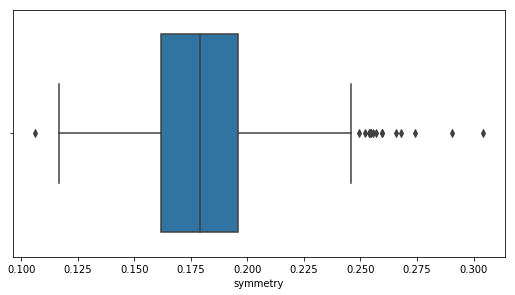

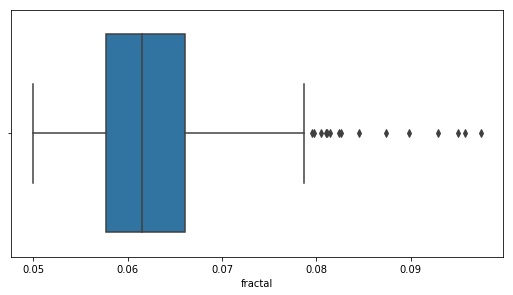

In [40]:
plt.figure(figsize=(30,10))
plt.subplot(2,3,1)
sns.boxplot(x='smoothness',data=tumor_mean)
plt.figure(figsize=(30,10))
plt.subplot(2,3,2)
sns.boxplot(x='concavity',data=tumor_mean)
plt.figure(figsize=(30,10))
plt.subplot(2,3,3)
sns.boxplot(x='compactness',data=tumor_mean)
plt.figure(figsize=(30,10))
plt.subplot(2,3,4)
sns.boxplot(x='concave points',data=tumor_mean)
plt.figure(figsize=(30,10))
plt.subplot(2,3,5)
sns.boxplot(x='symmetry',data=tumor_mean)
plt.figure(figsize=(30,10))
plt.subplot(2,3,6)
sns.boxplot(x='fractal',data=tumor_mean)


From this we can see the centralization of data and  we discover that there is outliers

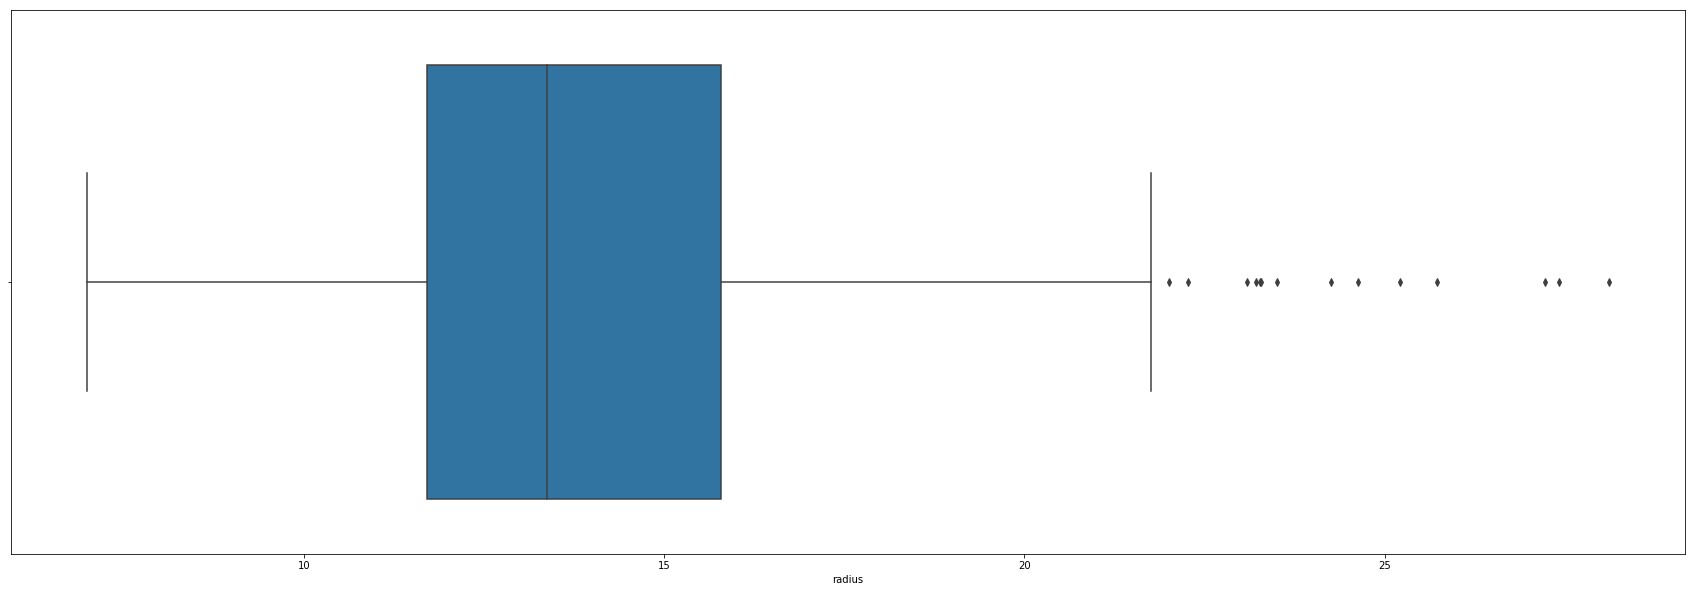

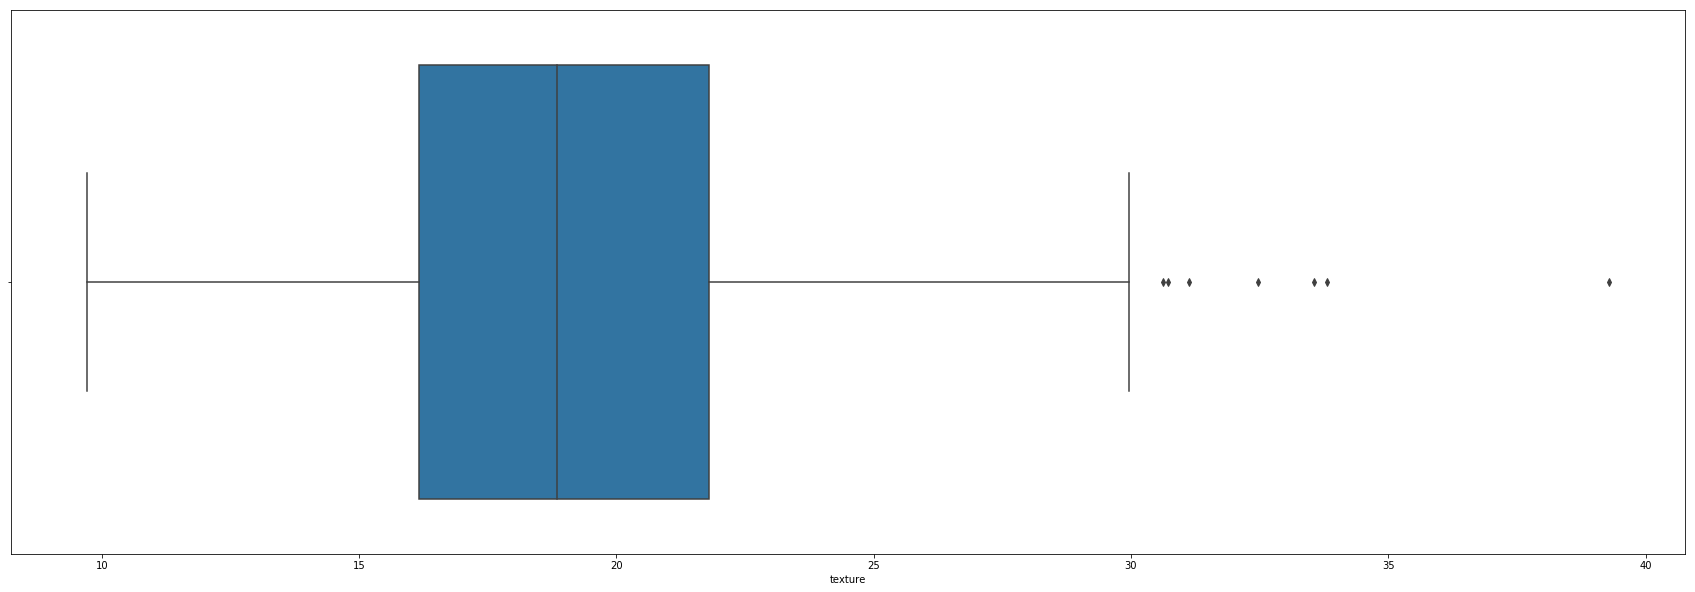

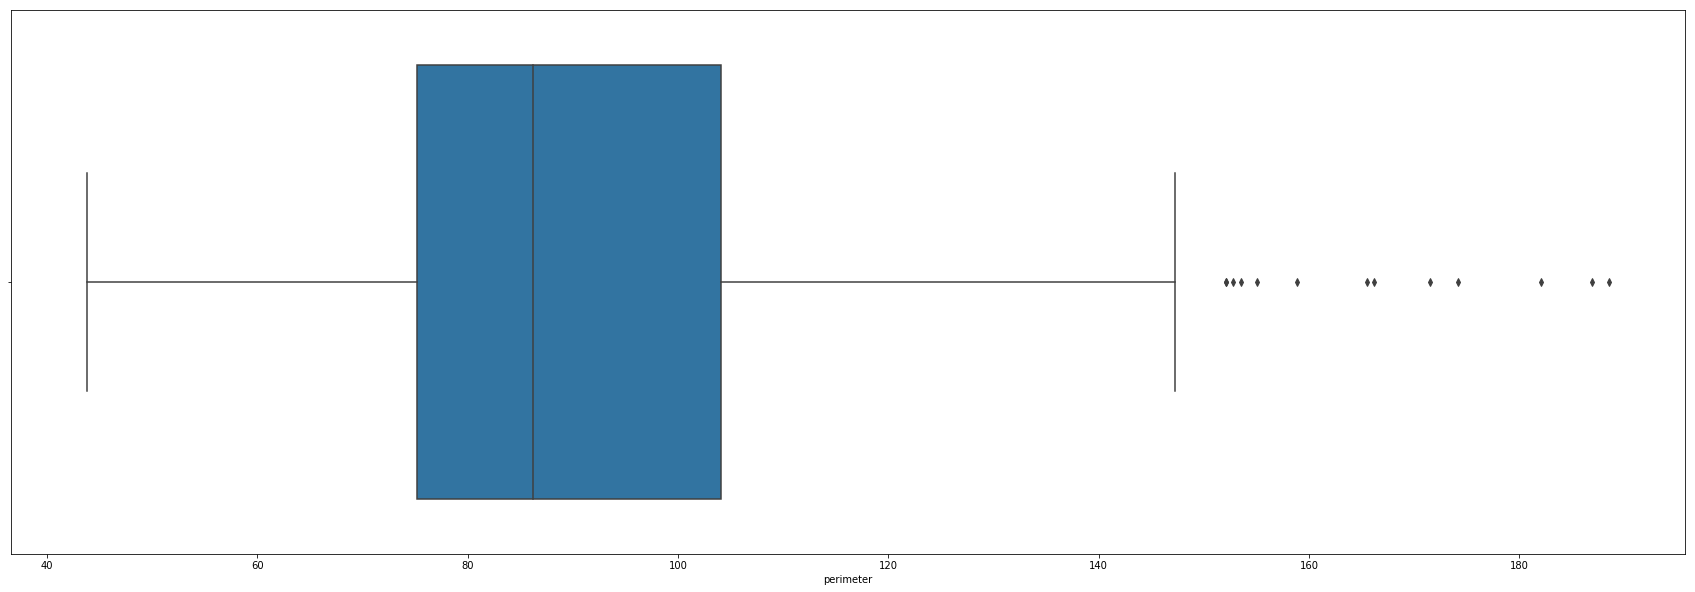

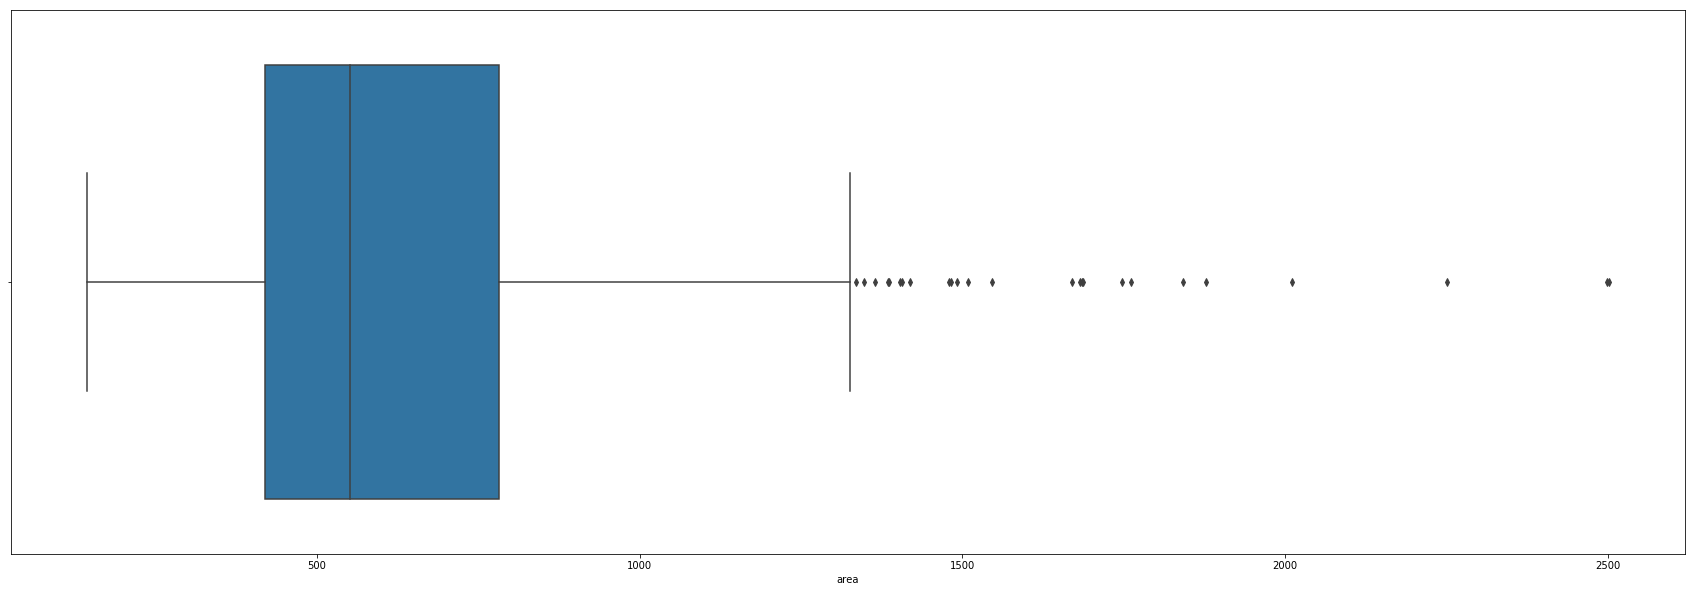

In [41]:
plt.figure(figsize=(30,10))

sns.boxplot(x='radius',data=tumor_mean)
plt.figure(figsize=(30,10))

sns.boxplot(x='texture',data=tumor_mean)
plt.figure(figsize=(30,10))

sns.boxplot(x='perimeter',data=tumor_mean)
plt.figure(figsize=(30,10))

sns.boxplot(x='area',data=tumor_mean)


# working with outliers

In [138]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

data=remove_outlier(tumor_mean)

In [139]:
data.shape

(331, 11)

# now let us see the distribution after delete outliers

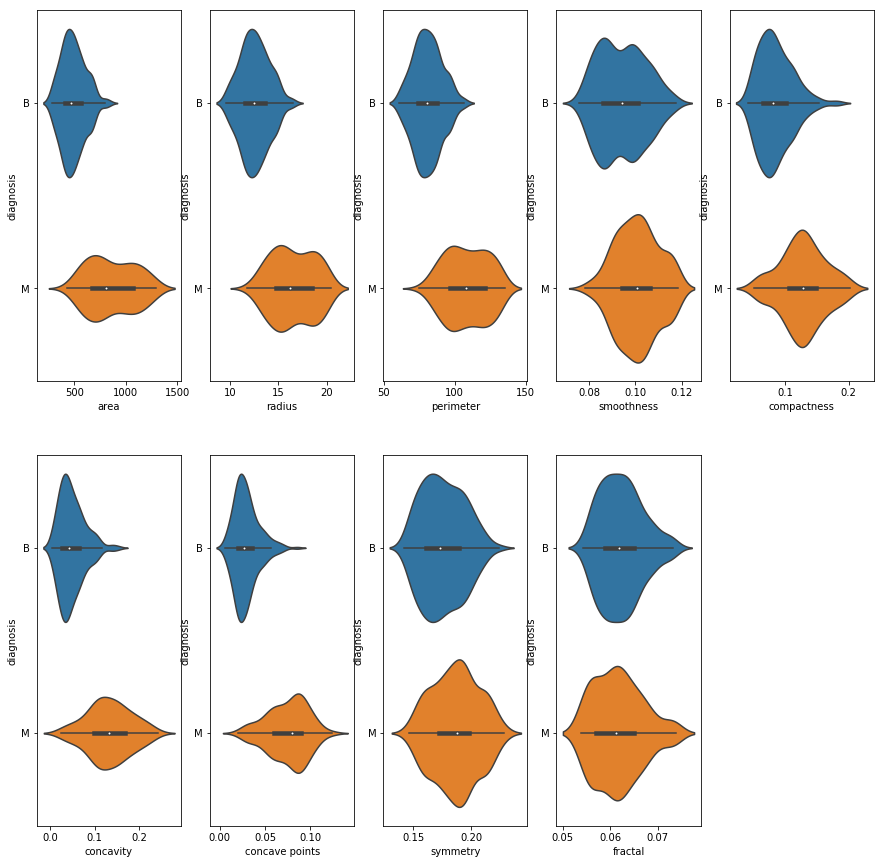

In [140]:
plt.figure(figsize=(15,15))
plt.subplot(2,5,1)
sns.violinplot(x='area',y='diagnosis',data=data)
plt.subplot(2,5,2)
sns.violinplot(x='radius',y='diagnosis',data=data)
plt.subplot(2,5,3)
sns.violinplot(x='perimeter',y='diagnosis',data=data)
plt.subplot(2,5,4)
sns.violinplot(x='smoothness',y='diagnosis',data=data)
plt.subplot(2,5,5)
sns.violinplot(x='compactness',y='diagnosis',data=data)
plt.subplot(2,5,6)
sns.violinplot(x='concavity',y='diagnosis',data=data)
plt.subplot(2,5,7)
sns.violinplot(x='concave points',y='diagnosis',data=data)
plt.subplot(2,5,8)
sns.violinplot(x='symmetry',y='diagnosis',data=data)
plt.subplot(2,5,9)
sns.violinplot(x='fractal',y='diagnosis',data=data)


Now we can answer some questions, such as how to determine the type of disease
1- We can see that the area of ​​the malignant tumor ranges between 0 to 700 in most cases, but the malignancy exceeds that
2- The text of the diameter of the adenoma between 10 and 15, unlike the malignant tumor that exceeds that
3- The circumference of the benign tumor is between 50 to 100, and if it increases, it will become malignant
4- Concave adenoma from 0 to 0.1 in benign tumor
5- Concave point in the adenoma between 0.05

<Figure size 720x720 with 0 Axes>

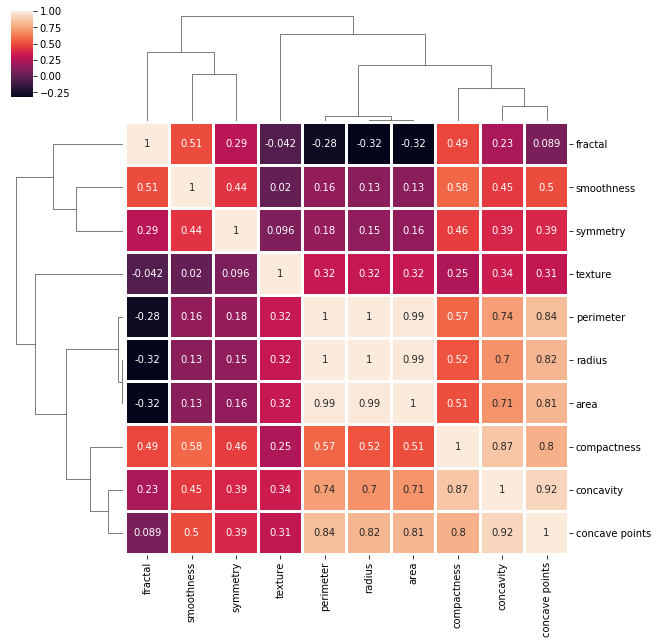

In [141]:
plt.figure(figsize=(10,10))
sns.clustermap(data.corr(),linewidths=2,annot=True)

now we can observed 
the radius, perimeter and area are highly correlated as expected from their relation so from these we will use anyone of them
compactness, concavity and concavepoint are highly correlated so we will use compactness from here
so selected Parameter for use is perimeter, texture, compactness, symmetry*

In [142]:
data=data[["diagnosis",'perimeter','texture','compactness', 'symmetry']]

In [143]:
data.iloc[:,1:].melt().groupby('variable').sum()

,value
variable,
compactness,33.33881
perimeter,30042.08000
symmetry,59.41810
texture,6284.58000


In [144]:
data.head()

,diagnosis,perimeter,texture,compactness,symmetry
id,,,,,
84358402,M,135.10,14.34,0.13280,0.1809
844359,M,119.60,19.98,0.10900,0.1794
845636,M,102.70,23.24,0.06669,0.1528
84610002,M,103.60,17.89,0.12920,0.1842
848406,M,94.74,20.13,0.07200,0.1586


In [157]:
data['diagnosis']=data['diagnosis'].replace('M',1)
data['diagnosis']=data['diagnosis'].replace('B',0)

In [163]:
data.head()

,diagnosis,perimeter,texture,compactness,symmetry
id,,,,,
84358402,1,135.10,14.34,0.13280,0.1809
844359,1,119.60,19.98,0.10900,0.1794
845636,1,102.70,23.24,0.06669,0.1528
84610002,1,103.60,17.89,0.12920,0.1842
848406,1,94.74,20.13,0.07200,0.1586


now i will doing feature Scaling to measure spread of the data

In [182]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
data_f = sc_X.fit_transform(data)

E:\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

E:\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [183]:
data_f= pd.DataFrame(data_f)

In [184]:
data_f.head()

,0,1,2,3,4
0,1.334733,2.501863,-1.480620,0.884104,0.072326
1,1.334733,1.627252,0.316525,0.228161,-0.005773
2,1.334733,0.673644,1.355300,-0.937929,-1.390727
3,1.334733,0.724428,-0.349438,0.784886,0.244144
4,1.334733,0.224489,0.364321,-0.791582,-1.088744


In [185]:
data_f.columns=[["diagnosis",'perimeter','texture','compactness', 'symmetry']]

In [186]:
data_f.head()

,diagnosis,perimeter,texture,compactness,symmetry
0,1.334733,2.501863,-1.480620,0.884104,0.072326
1,1.334733,1.627252,0.316525,0.228161,-0.005773
2,1.334733,0.673644,1.355300,-0.937929,-1.390727
3,1.334733,0.724428,-0.349438,0.784886,0.244144
4,1.334733,0.224489,0.364321,-0.791582,-1.088744


In [212]:
data_f[['texture','perimeter']].iplot(kind='spread',title='spread of texture and perimeter')

In [213]:
data_f[['compactness','symmetry']].iplot(kind='spread',title='spread of compactness and symmetry')

In [211]:
data_f.head()

,diagnosis,perimeter,texture,compactness,symmetry
0,1.334733,2.501863,-1.480620,0.884104,0.072326
1,1.334733,1.627252,0.316525,0.228161,-0.005773
2,1.334733,0.673644,1.355300,-0.937929,-1.390727
3,1.334733,0.724428,-0.349438,0.784886,0.244144
4,1.334733,0.224489,0.364321,-0.791582,-1.088744
